# Assignment 4

## Adam Fair

**Some questions will have code answers, some formatted text, and some both. This is indicated in this assignment template.**

In [11]:
#### Load the packages needed for the assignment in this cell
library(tidyverse)
library(modelr)
library(plyr)
require(readstata13)
options(na.action = na.warn)

## Section 1 Exercises

### 1. (12 pts.) Google the function read_csv and find a way to import the Barro-Lee dataset into your R session. You can check Chapter 11 in the R for Data Science book for how to do this. Similarly, install and load the package readstata13 and look up the function read.dta13 to load the Penn World Table dataset. In the Barro-Lee dataset, filter out so that you only consider people between and including 20 and 24 years old, using the variables ageto and agefrom.

In [12]:
# Type Code in this cell that answers the question

PWT.df = read.dta13("pwt90.dta")
BL.df = read.dta13("BL2013_MF_v2.2.dta")
#using the read_csv function for the data frame returned the error "Warning message:"5993 parsing failures."


BL.df2 <- BL.df %>%
filter(agefrom == 20) %>%
filter(ageto == 24)

head(BL.df2)
head(PWT.df)

BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
1,Algeria,1950,MF,20,24,81.48148,16.21622,4.304305,1.901902,0.7510979,0.4004004,0.16429859,0.8916848,0.7537538,0.1266370,0.011294007,756,DZA,Middle East and North Africa
1,Algeria,1955,MF,20,24,84.60000,13.50000,2.800000,1.800000,0.9000000,0.1000000,0.04078325,0.7118157,0.6030000,0.1060000,0.002815671,839,DZA,Middle East and North Africa
1,Algeria,1960,MF,20,24,83.70000,12.90000,2.877756,2.800000,1.5593042,0.6000000,0.24195360,0.8949509,0.6773326,0.2007791,0.016839102,913,DZA,Middle East and North Africa
1,Algeria,1965,MF,20,24,75.90000,17.70000,5.372808,5.600000,3.8085012,0.8000000,0.32037264,1.4928467,1.0761843,0.3942550,0.022407413,975,DZA,Middle East and North Africa
1,Algeria,1970,MF,20,24,52.90000,31.20000,10.023290,15.400000,11.1555700,0.4000000,0.15818934,3.1745296,2.1846988,0.9786671,0.011163652,1021,DZA,Middle East and North Africa
1,Algeria,1975,MF,20,24,39.27015,41.96342,5.325005,16.585915,12.1476336,2.1805212,0.84833354,3.7857180,2.5446389,1.1805021,0.060577035,1326,DZA,Middle East and North Africa


countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
ABW,Aruba,Aruban Guilder,1950,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1951,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1952,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1953,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1954,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1955,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 2. (15 pts.) Read Chapter 13.4 in R for Data Science, and use it to find a way to combine the Penn World Table and the Barro-Lee data set. Try using a “left_join” and and “inner_join”. Summarize how your results are different. Then, use inner_join to create your main dataset, and call it gdp_sch.

#### Note 1: You will match on country codes and year. You will have to rename these variables in the Barro-Lee dataset to ensure that they will match. Do this using “rename”. Use the name “countrycode” for the three-letter country code, and “year” (in lower-case letters) for year.
#### Note 2: Select countrycode, year, and yr_sch (average years of schooling) from the Barro-Lee data set before matching. These are the variables you will use, and minimizes the risk that the join tries to match on variables that you do not want to match on (e.g., population).

In [25]:
BL.df3 <- BL.df2 %>% 
    rename(c("WBcode"="countrycode")) %>%
    select(countrycode, year, yr_sch)
    
#the two methods of joining for comparison

df_left_joined <- BL.df3 %>%
    left_join(PWT.df, by = c("countrycode", "year"))

df_inner_joined <- BL.df3 %>%
    inner_join(PWT.df, by = c("countrycode", "year"))

colnames(df_left_joined)
colnames(df_inner_joined)


#creation of gdp_sch

gdp_sch <- PWT.df %>%
    inner_join(BL.df3, by = c("countrycode", "year"))

head(gdp_sch)

[1] "countrycode"   "year"          "yr_sch"        "country"      
 [5] "currency_unit" "rgdpe"         "rgdpo"         "pop"          
 [9] "emp"           "avh"           "hc"            "ccon"         
[13] "cda"           "cgdpe"         "cgdpo"         "ck"           
[17] "ctfp"          "cwtfp"         "rgdpna"        "rconna"       
[21] "rdana"         "rkna"          "rtfpna"        "rwtfpna"      
[25] "labsh"         "delta"         "xr"            "pl_con"       
[29] "pl_da"         "pl_gdpo"       "i_cig"         "i_xm"         
[33] "i_xr"          "i_outlier"     "cor_exp"       "statcap"      
[37] "csh_c"         "csh_i"         "csh_g"         "csh_x"        
[41] "csh_m"         "csh_r"         "pl_c"          "pl_i"         
[45] "pl_g"          "pl_x"          "pl_m"          "pl_k"

[1] "countrycode"   "year"          "yr_sch"        "country"      
 [5] "currency_unit" "rgdpe"         "rgdpo"         "pop"          
 [9] "emp"           "avh"           "hc"            "ccon"         
[13] "cda"           "cgdpe"         "cgdpo"         "ck"           
[17] "ctfp"          "cwtfp"         "rgdpna"        "rconna"       
[21] "rdana"         "rkna"          "rtfpna"        "rwtfpna"      
[25] "labsh"         "delta"         "xr"            "pl_con"       
[29] "pl_da"         "pl_gdpo"       "i_cig"         "i_xm"         
[33] "i_xr"          "i_outlier"     "cor_exp"       "statcap"      
[37] "csh_c"         "csh_i"         "csh_g"         "csh_x"        
[41] "csh_m"         "csh_r"         "pl_c"          "pl_i"         
[45] "pl_g"          "pl_x"          "pl_m"          "pl_k"

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,yr_sch
ALB,Albania,Lek,1950,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,3.503085
ALB,Albania,Lek,1955,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.181777
ALB,Albania,Lek,1960,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.574713
ALB,Albania,Lek,1965,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.556429
ALB,Albania,Lek,1970,7195.136,7078.473,2.150602,0.7161763,NA,1.559145,...,0.003096413,-0.00547019,-0.0002164902,0.2695080,0.9090545,0.2165859,0.6291517,0.7380655,0.7258177,6.031481
ALB,Albania,Lek,1975,8762.292,8629.828,2.411229,0.8368413,NA,1.704198,...,0.018435117,-0.01770938,-0.0025058421,0.2632298,0.7907187,0.1980078,0.5052570,0.5867749,0.6386246,8.358098


From examining the two respective datasets, we see that the `inner_join` function only retains rows in both datasets, matching pairs of observations whenever their keys are equal. Whereas the `left_join` function prioritizes the left dataset, keeping all observations in `x`.

We can use `by` to tell dplyr which variable is the key, which we did in both methods above instructing the script to use `year` and `countrycode`.

### 3. (10 pts.) Calculate GDP per capita (y) and add it to “gdp_sch” using mutate. Select the variables “year”, “countrycode”, “y”, “yr_sch” . Filter so that you only have the years 1960 and 2010, and only the observations that both have schooling and GDP data for these years (refer to the filter exercises in the earlier assignment). Also create a variable “ln_y” as the natural logarithm of y.

In [26]:
# Type Code in this cell that answers the question

target  <- c("1960", "2010")

gdp_sch <- gdp_sch %>%
    mutate(y = rgdpe / pop) %>%
    select(year, countrycode, y, yr_sch) %>%
    filter(year %in% target) %>%
    drop_na(yr_sch) %>%
    drop_na(y) %>%
    mutate(ln_y = log(y))
    

head(gdp_sch)


,year,countrycode,y,yr_sch,ln_y
2,2010,ALB,8978.370,11.124534,9.102574
4,2010,ARE,56490.122,9.529076,10.941821
5,1960,ARG,3200.288,6.795064,8.070996
6,2010,ARG,18501.466,10.545528,9.825605
8,2010,ARM,7111.749,10.874534,8.869504
9,1960,AUS,14059.699,9.665625,9.551068


### 4. (3 pts.) Create average GDP growth and remove 2010 observations by running lines of code below. Summarize what the code does in your answers.

In [27]:
gdp_sch <- gdp_sch %>%
              group_by(countrycode) %>%
              mutate(g   = log(  lead(y) / y )/ (2010 - 1960)  ) %>%
              filter(year == 1960) %>%
              select(-year)
head(gdp_sch)

countrycode,y,yr_sch,ln_y,g
ARG,3200.2882,6.7950640,8.070996,0.0350921824
AUS,14059.6987,9.6656246,9.551068,0.0224296988
AUT,9347.8030,7.0353875,9.142897,0.0302757647
BDI,655.8072,1.2076243,6.485867,-0.0005668748
BEL,10486.7160,8.4332666,9.257865,0.0271321822
BEN,1577.3109,0.6454067,7.363477,0.0018266246


The code in the cell above creates average GDP growth and removes 2010 observations.

First, we see it group the data by the `countrycode` variable. Then, it creates new variable `g` to represent the average annual GDP Growth by performing the following calculation: log(  lead(y) / y )/ (2010 - 1960). Next, it uses the `filter` function to remove any data not from the year 1960. Finally, the code deletes the `year` column.

We can see from the output that the code did all of the above succesfully.

## Section 2 Exercises

### 1. (5 pts.) The first test is to check whether poor countries, in general, grew faster in the period 1960-2010 time periods. To test this, draw a graph of inital GDP on the x-axis and subsequent growth on the y-axis. Use scale_x_continuous to create a log-scale on the x-axis, and include the code that generates the graph in your notebook. If you have done it correctly, you will see a graph that looks something like the one below. Apparently, there is very little connection between initial GDP per capita and subsequent growth. If there was convergence, this graph should slope downwards: rich countries should grow slower. Thus, convergence fails!


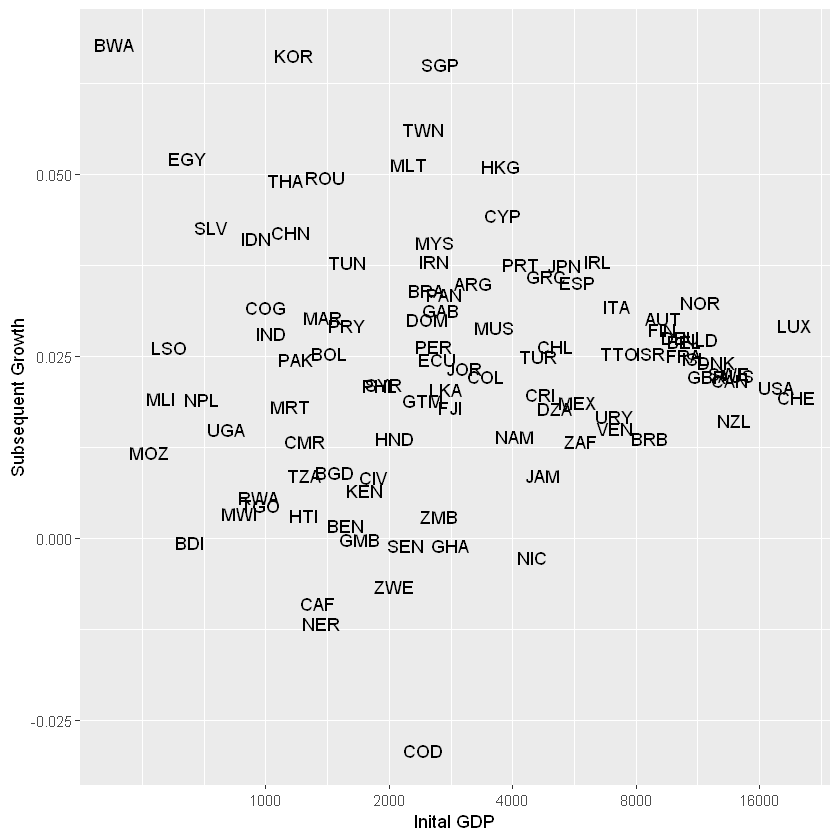

In [28]:
ggplot(data = gdp_sch) + 
    geom_text(mapping = aes(x = y, y = g, label = countrycode)) +
    xlab("Inital GDP") +
    ylab("Subsequent Growth") +
    scale_x_continuous(trans = 'log', breaks = 1000* 2**(0:10))



### 2. (5 pts.) Why did the simple prediction not go through? Well, an obvious issue is omitted variable bias. Countries that were poor in 1960 had other problems that might have made them less likely to grow. To test if this is a relevant concern, plot 1960 GDP per capita on the x-axis, and average 1960 years of schooling on the y-axis. Make sure to include the code that generates the graph in your notebook.

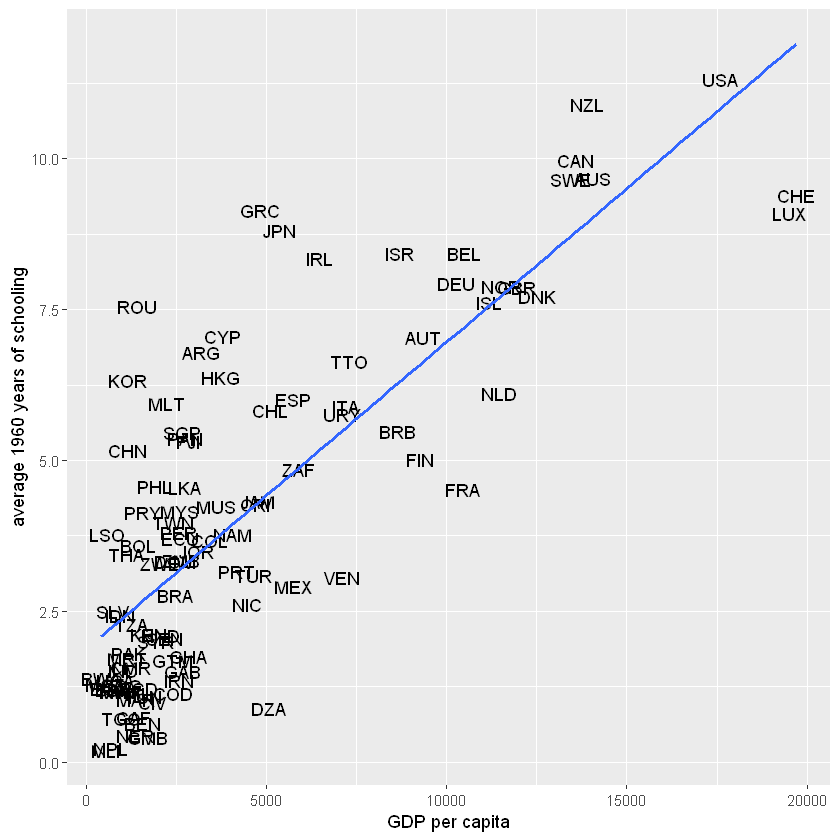

In [29]:
ggplot(data = gdp_sch) + 
    geom_text(mapping = aes(x = y, y = yr_sch, label = countrycode)) +
    xlab("GDP per capita") +
    ylab("average 1960 years of schooling") +
    geom_smooth(mapping = aes(x = y, y = yr_sch), method = "lm", se = FALSE)

### 3. (5 pts.) A natural way to check how much this could matter is to plot the years of schooling against subsequent growth. Do this by plotting yr_sch on the x-axis and g on the y-axis. Add both a linear plot and a smooth plot using geom_smooth. Include the code that generates the graph in your notebook.

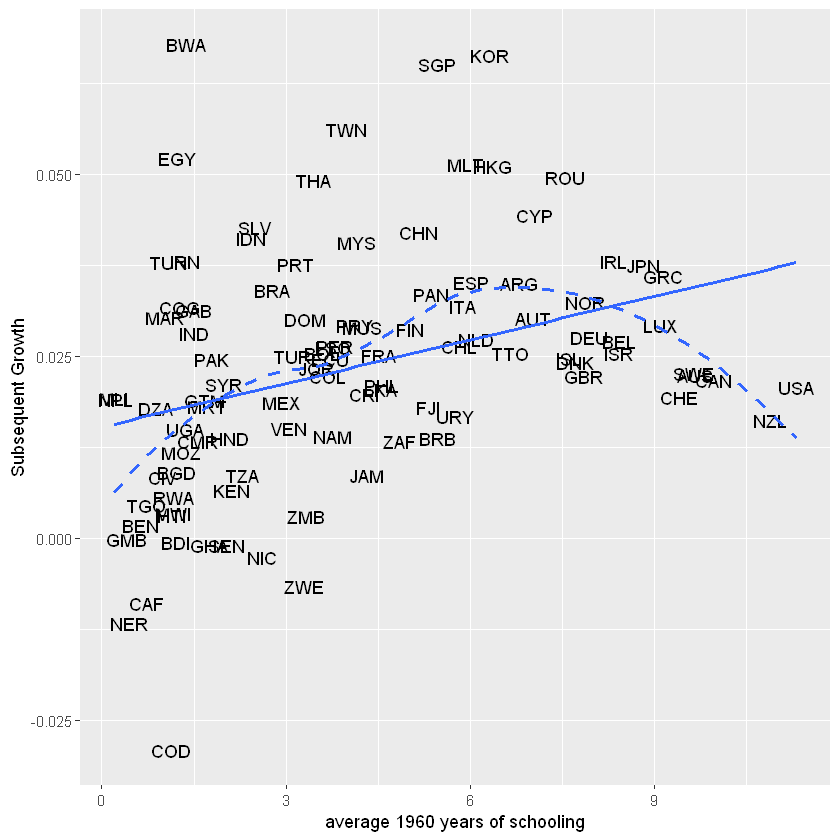

In [30]:
ggplot(data = gdp_sch) + 
    geom_text(mapping = aes(x = yr_sch, y = g, label = countrycode)) +
    xlab("average 1960 years of schooling") +
    ylab("Subsequent Growth") +
    geom_smooth(mapping = aes(x = yr_sch, y = g), method = "lm", se = FALSE) +
    geom_smooth(mapping = aes(x = yr_sch, y = g), linetype = "dashed", method = "loess", se = FALSE)

## Section 3 Exercises

### 1. (5 pts.) Add fitted values (called predictions in R) to gdp_sch. You should use add_predictions() which takes a data frame and a model as arguments. It adds the predictions from the model to a new column in the data frame. Read up on the example of add_predictions in Chapter 23 in R for Data Science. Note: you will need to include the regression model commands and the code that generates the grid in your script for it to run without errors.

In [31]:
lm_sch1 <- lm(yr_sch ~ ln_y, data = gdp_sch)
  coef(lm_sch1)

gdp_sch <- gdp_sch %>%
    data_grid(countrycode, y, yr_sch, ln_y, g)

gdp_sch <- gdp_sch %>%
    add_predictions(lm_sch1)
head(gdp_sch)

(Intercept)        ln_y 
 -14.569677    2.349474

countrycode,y,yr_sch,ln_y,g,pred
ARG,3200.2882,6.7950640,8.070996,0.0350921824,4.3929197
AUS,14059.6987,9.6656246,9.551068,0.0224296988,7.8703097
AUT,9347.8030,7.0353875,9.142897,0.0302757647,6.9113222
BDI,655.8072,1.2076243,6.485867,-0.0005668748,0.6686995
BEL,10486.7160,8.4332666,9.257865,0.0271321822,7.1814365
BEN,1577.3109,0.6454067,7.363477,0.0018266246,2.7306211


### 2. (5 pts.) Plot the predicted line from the regression of yr_sch on ln_y, overlaying it on a scatterplot of the data. Include the code that generates the graph in your notebook.

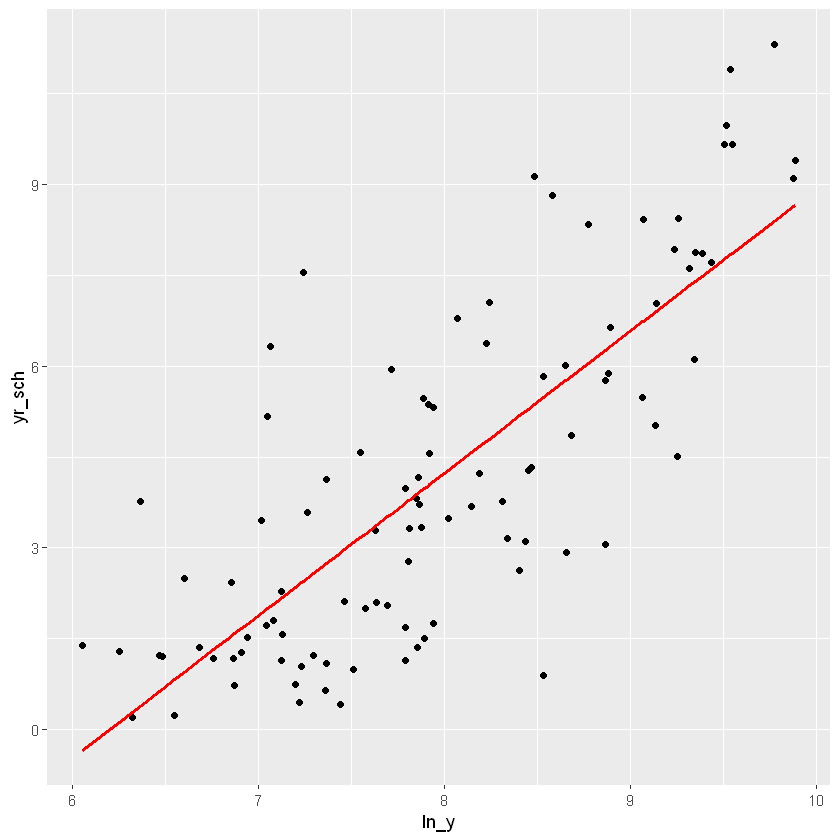

In [32]:
ggplot(lm_sch1, aes(ln_y)) +
  geom_point(aes(y = yr_sch)) +
  geom_line(aes(y = pred), data = gdp_sch, colour = "red", size = 1)

## Section 4 Exercises

### 1. (5 pts.) Check Chapter 23 on how to add residuals, and add them to gdp_sch.

countrycode,y,yr_sch,ln_y,g,pred,resid
ARG,3200.2882,6.7950640,8.070996,0.0350921824,4.3929197,2.4021443
AUS,14059.6987,9.6656246,9.551068,0.0224296988,7.8703097,1.7953149
AUT,9347.8030,7.0353875,9.142897,0.0302757647,6.9113222,0.1240653
BDI,655.8072,1.2076243,6.485867,-0.0005668748,0.6686995,0.5389249
BEL,10486.7160,8.4332666,9.257865,0.0271321822,7.1814365,1.2518302
BEN,1577.3109,0.6454067,7.363477,0.0018266246,2.7306211,-2.0852144


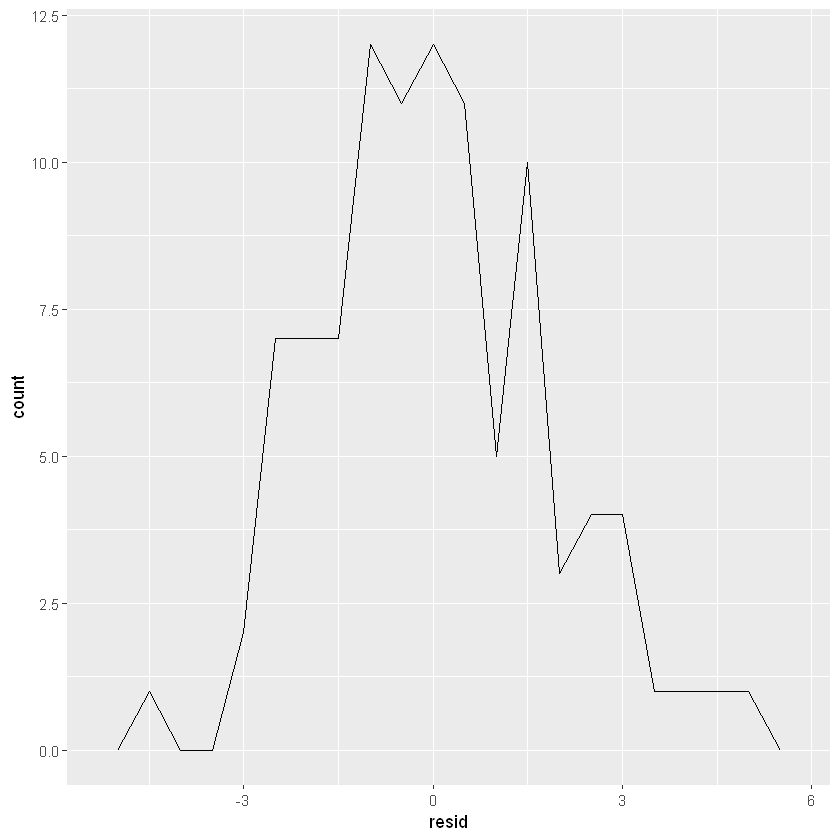

In [33]:
gdp_sch <- gdp_sch %>% 
  add_residuals(lm_sch1)

head(gdp_sch)

ggplot(gdp_sch, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

### 2. (10 pts.) Plot initial log GDP per capita and the residuals, with residuals on the y-axis. The graph should have no systematic relationship between GDP and the residuals if the model is correct. Note the empty space in the lower left corner. What do you think is the reason for this? Go back and check the raw plot of GDP and schooling for hints. Include the code that generates the graph in your notebook.

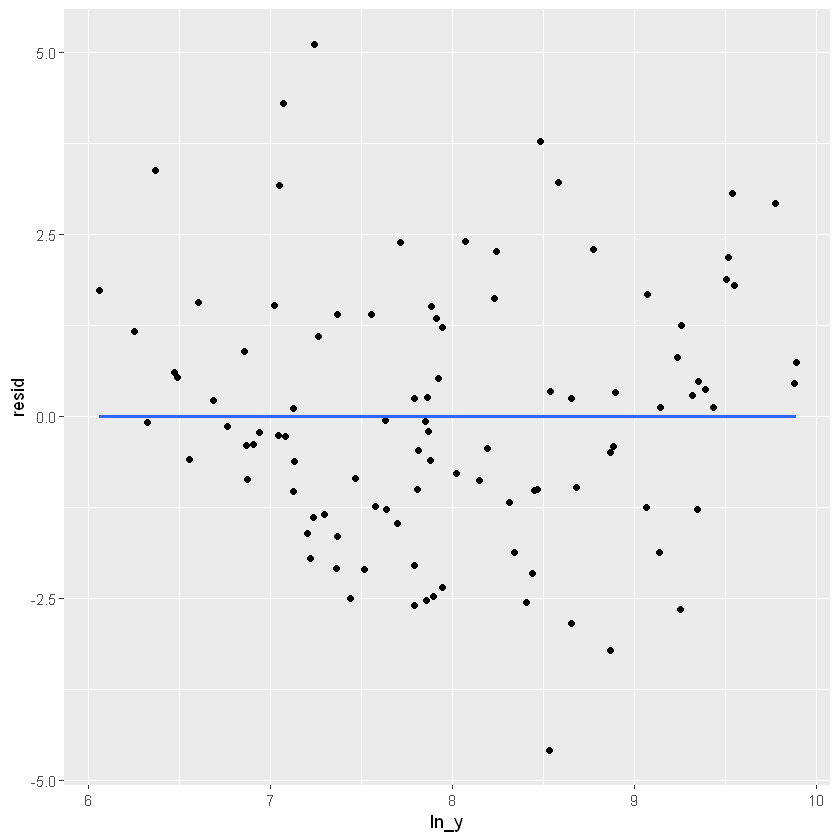

In [34]:
ggplot(gdp_sch, aes(ln_y)) +
    geom_point(aes(y = resid)) +
    geom_smooth(mapping = aes(x = ln_y, y = resid), method = "lm", se = FALSE)

We see that the model is correct as there is no systematic relationship between GDP and the residuals. TThe reason for the empty space is that the residuals for the values on the left should be closer to zero.

### 3. (10 pts.) Plot the relationship between the residuals from lm_sch1 and subsequent growth, with growth on the y-axis. How does the relationship look? Explain what this means in words, in terms of the growth experience of countries that have “more than expected schooling” and “less than expected” schooling. Include the code that generates the graph in your notebook.

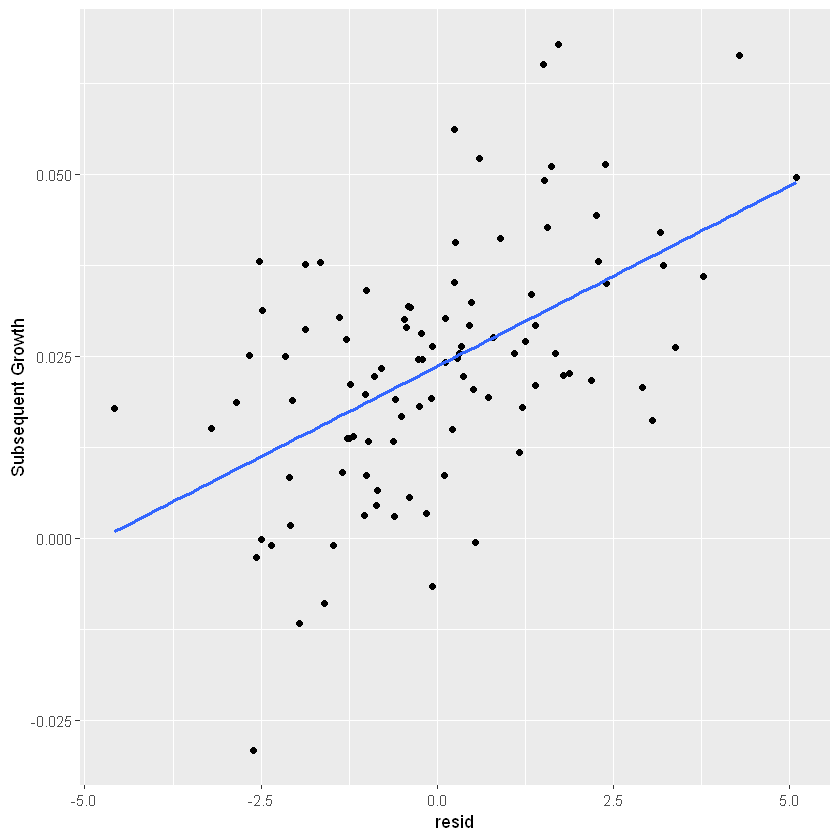

In [35]:
ggplot(gdp_sch, aes(resid)) +
    geom_point(aes(y = g))  +
    ylab("Subsequent Growth") +
    geom_smooth(mapping = aes(x = resid, y = g), method = "lm", se = FALSE)

It is a positive relationship. Countries that have had "more than expected schooling" have grown more and countries that have had "less than expected schooling" have grown even less.

### 4. (5 pts.) What does geom_ref_line() do? What package does it come from? Why is displaying a reference line in plots showing residuals useful and important?

The function `geom_ref_line()` adds a geom as reference line to a plot. It is equivalent to running `geom_hline()` or `geom_vline()` with default settings that are useful for visualizing models. It is included within the `modelr` package. Putting a reference line at zero for residuals is important because good models (generally) should have residuals centered at zero, with approximately the same variance (or distribution) over the support of x, and no correlation. A zero reference line makes it easier to judge these characteristics visually.

### 5. (6 pts.) Run three regressions, with growth as the dependent variable in all of them.
#### Do one regression on initial schooling,
#### Do one regression on the log of initial GDP, and
#### Do one on both variables.

In [36]:
lm_in_sch <- lm(data = gdp_sch, g ~ yr_sch)

lm_ln_y <- lm(data = gdp_sch, g ~ ln_y)

lm_both <- lm(data = gdp_sch, g ~ yr_sch + ln_y)

### 6. (5 pts.) Import in the library the package stargazer to make a table of the regression results you obtained in the previous question and include it in your submission folder. Use the html option to obtain a properly formatted table. Make sure to include the html output in your submission folder.

In [37]:
library(stargazer)

stargazer(lm_in_sch, type = "html", title = "Initial Schooling and Economic Growth Regression Results", out= "Initial_Schooling_and_Economic_Growth_Regression_Results.htm")
stargazer(lm_ln_y, type = "html", title = "Initial Schooling and Log of Initial GDP Regression Results", out= "Initial_Schooling_and_Log_of_Initial_GDP_Regression_Results.htm")
stargazer(lm_both, type = "html", title = "Initial Schooling and Economic Growth and Log of Initial GDP Regression Results", out= "Initial_Schooling_and_Economic_Growth_and_Log_of_Inititial_GDP_Regression_Results.htm")



<table style="text-align:center"><caption><strong>Initial Schooling and Economic Growth Regression Results</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>g</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">yr_sch</td><td>0.002<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>0.015<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.003)</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>100</td></tr>
<tr><td s

### 7. (9 pts.) Interpret the coefficients, the significance level, and the R-squared value for each of the three regressions. Make sure to use words to describe the economic interpretation of the coefficients.

The coefficients for the first regression are statistically significant at the lowest p value p<0.01 therefore there is a non-zero correlation in the data. From the regression of the data and the statistical signifigance, we know that growth and initial schooling are positively correlated.

The coefficients for the second regression are not statistically significant even at the highest p value p<0.1 therefore there is not a non-zero correlation in the data. From the regression of the data and the non-statistical signifigance, we know that there is no relationship between growth and Log of Initital GDP.

The coefficients for the third regression are statistically significant at the lowest p value p<0.01 therefore there is a non-zero correlation in the data. From the regression of the data and the statistical signifigance, we know that economic growth, initial schooling, and Log of Initital GDP are positively correlated

R-squared measures the strength of the relationship between the model and the dependent variable.

The R^2 values are 0.115, 0.0002, and 0.276, respectively. This means that the third regression has the strongest relationship between the model and the dependent variable.